### Main funtion that takes in two matrics (3D and 2D) and return calculated params


For starting create a random matrix

In [1]:
import random 
import numpy as np

In [200]:
mW = np.loadtxt('myWCoords.txt')
mC = np.loadtxt('myCCoords.txt')
mW = np.append(mW,np.ones((mW.shape[0],1)),axis=1)


In [201]:
W = mW
C = mC
W.shape,C.shape

((48, 4), (48, 2))

Specify number of observation points 

In [202]:
n=W.shape[0]

Create 3d matrix which represents world coordinate system and 2d matrix which represents camera coordinate system
Note: We'll append 1 in world coordinates so dim will be (nx4) for 2d it will be (nx2)

In [3]:
W = np.array([[random.randint(1,10) for i in range(3)]+[1] for j in range(n)])
W

array([[ 5,  5,  7,  1],
       [ 3,  3,  9,  1],
       [ 4,  8,  9,  1],
       [ 9,  9,  7,  1],
       [ 9,  1, 10,  1],
       [ 1,  1,  1,  1]])

In [4]:
C = np.array([[random.randint(200,400) for i in range(2)] for j in range(n)])
C

array([[375, 306],
       [337, 302],
       [213, 263],
       [306, 396],
       [317, 319],
       [333, 254]])

Now we will make the P matrix (from P.m = 0) which has dim (2nX12)

Now fill in the value according to the eqaution:    
Pi x m1 + 0 x m2 -  X0 x Pi x m3 = 0    
0 x m1 + Pi x m2 -  Y0 x Pi x m3 = 0

In [242]:
P = np.zeros((2*n,12),dtype = 'float64')
for i in range(n):
    P[i*2,0:4] = W[i]
    P[i*2,8:12] = -C[i][0]*W[i]
    P[i*2+1,4:8] = W[i]
    P[i*2+1,8:12] = -C[i][1]*W[i]
P.dtype

dtype('float64')

Now we will go on calculating Eigenvector decomposition for Pt x P  matrix. Then choosing the Eigenvector corresponding to minimum eigen value to obtain the solution P x m  = 0  

In [243]:
w, v = np.linalg.eig(np.matmul(P.T,P))
w.shape,v.shape

((12,), (12, 12))

In [244]:
min_eigenval = w.shape[0]-1
m = v[:,min_eigenval]
m.shape,m

((12,), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

In [245]:
m = m.reshape((3,4))
m.shape,m

((3, 4), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.]]))

In [228]:
a1 = m[0,0:3]
a2 = m[1,0:3]
a3 = m[2,0:3]
B = m[:,-1]
a1,a2,a3,B

(array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 1.]),
 array([0., 0., 0.]))

In [229]:
ro = 1/np.linalg.norm(a3)
r3 = ro*a3
X0 = ro*ro*np.dot(a1, a3)
Y0 = ro*ro*np.dot(a2, a3)
alpha = ro*ro*np.linalg.norm(np.cross(a1, a3))
beta = ro*ro*np.linalg.norm(np.cross(a2, a3))

In [230]:
ro,r3,X0,Y0,alpha,beta

(1.0, array([0., 0., 1.]), 0.0, 0.0, 0.0, 0.0)

In [231]:
cosTheta = -np.dot(np.cross(a1,a3),np.cross(a2,a3))/(np.linalg.norm(np.cross(a1,a3))*np.linalg.norm(np.cross(a2,a3)))
sinTheta = (1-cosTheta**2)**(1/2)
r1 = np.cross(a2,a3)/np.linalg.norm(np.cross(a2,a3))
r2 = np.cross(r3,r1)

/home/ee/mtech/eet172294/anaconda3/envs/gan/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/home/ee/mtech/eet172294/anaconda3/envs/gan/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [232]:
cosTheta,sinTheta,r1,r2

(nan, nan, array([nan, nan, nan]), array([nan, nan, nan]))

### After Calculation of parameters, We double check by calculating 2d points from 3D and compare. 

In [196]:
W.shape,C.shape,m.shape

((6, 4), (6, 2), (3, 4))

Now We will calculate camaera coordinate (x and y) from world coordinate and estimated mateix M

The formula is                    
X = (m1 x Pi) / (m3 x Pi)              
Y = (m2 x Pi) / (m3 x Pi)

In [197]:
C_calculated = np.zeros((n, 2))
for i in range(n):
    C_calculated[i,0] = np.dot(m[0],W[i])/np.dot(m[2],W[i])
    C_calculated[i,1] = np.dot(m[1],W[i])/np.dot(m[2],W[i])
C_calculated = np.round(C_calculated)

# C_calculated

/home/ee/mtech/eet172294/anaconda3/envs/gan/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ee/mtech/eet172294/anaconda3/envs/gan/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [198]:
sqrd_error = (C-C_calculated)**2   # (x1-x2)^2 (y1-y2)^2
sqrd_error = sqrd_error[:,0]+sqrd_error[:,1]
sqrd_error = sqrd_error**(1/2) 
sqrd_error

array([nan, nan, nan, nan, nan, nan])

How much error

In [199]:
sqrd_error = np.sum(sqrd_error)/n
sqrd_error

nan

###  All above code in a proper function

In [1]:
import random 
import numpy as np

In [120]:
def parameter_calculation(W,C):
    print('The World coordinate matrix Dim: ',W.shape)
    print('The Camera coordinate matrix Dim: ',C.shape)
    n = W.shape[0]
    print('Number of observation points found = ',n)
    
    P = np.zeros((2*n,12))
    for i in range(n):
        P[i*2,0:4] = W[i]
        P[i*2,8:12] = -C[i][0]*W[i]
        P[i*2+1,4:8] = W[i]
        P[i*2+1,8:12] = -C[i][1]*W[i]
    
    evals, evecs = np.linalg.eig(np.matmul(P.T,P))
    min_eigenval = evals.shape[0]-1
    m = evecs[:,min_eigenval] 
    m = m.reshape((3,4))
    a1 = m[0,0:3]
    a2 = m[1,0:3]
    a3 = m[2,0:3]
    B = m[:,-1]
        
    ro = 1/np.linalg.norm(a3,1)
    r3 = ro*a3
    X0 = ro*ro*np.dot(a1, a3)
    Y0 = ro*ro*np.dot(a2, a3)
    alpha = ro*ro*np.linalg.norm(np.cross(a1, a3),1)
    beta = ro*ro*np.linalg.norm(np.cross(a2, a3),1)
    
    r3 = r3.T
    cosTheta = -np.dot(np.cross(a1,a3),np.cross(a2,a3))/(np.linalg.norm(np.cross(a1,a3),2)*np.linalg.norm(np.cross(a2,a3),2))
    sinTheta = (1-cosTheta**2)**(1/2)
    r1 = np.cross(a2,a3)/np.linalg.norm(np.cross(a2,a3),2)
    r2 = np.cross(r3,r1)
    
    print('Parameter calculation Finished.')
    params = [[r1,r2,r3],[X0,Y0],[alpha,beta],[cosTheta,sinTheta]]
    return m,params


In [121]:
def C_calculation(W,M):
    W = np.asmatrix(W)
    M = np.asmatrix(M)
    C_calc = np.zeros((W.shape[0],3,1))
    for i in range(W.shape[0]):
        C_calc[i] =  np.matmul(M,W[i].T)/np.matmul(M[2],W[i].T)
    C_calc = C_calc[:,0:2,0]  # because last column is all ones.
    C_calc = np.round(C_calc) # because all coordinates are integers
    C_calc = C_calc.astype('int16') # values must lie in certain range
    return C_calc
    

In [122]:
def error(C,C_calc):
    sqrd_error = (C-C_calc)**2   # (x1-x2)^2 (y1-y2)^2
    sqrd_error = sqrd_error[:,0]+sqrd_error[:,1] # sum 
    sqrd_error = sqrd_error**(1/2) # take under-root
    return sqrd_error

#### Main funtion starts here

In [128]:
mW = np.loadtxt('WorldC.txt')
mC = np.loadtxt('CameraC2.txt')
mW = np.append(mW,np.ones((mW.shape[0],1)),axis=1)

M,params = parameter_calculation(mW,mC)
C_calc = C_calculation(mW,M)
sqrd_error = error(mC,C_calc)
avg_sqrd_error = np.mean(sqrd_error)
avg_sqrd_error

The World coordinate matrix Dim:  (14, 4)
The Camera coordinate matrix Dim:  (14, 2)
Number of observation points found =  14
Parameter calculation Finished.


551.3809166405622

In [129]:
params[3] #should be [0 1]

[0.15652821510546858, 0.9876734874825264]

In [130]:
np.arcsin(params[3][1])*(180*7/22) # should be 90

80.96197437090994

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

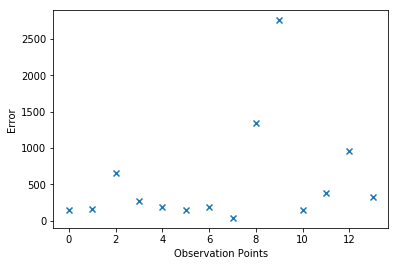

In [132]:
x = np.arange(14)
plt.scatter(x,sqrd_error,marker = 'x');
plt.xlabel('Observation Points');
plt.ylabel('Error');
